In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r"C:\Users\yaoyao tang\Jupyter\ML_B_CDs\carbon_dot.xlsx")

In [3]:
df.head()

,CA质量（g）,DEA体积（ml）,水体积（ml）,微波强度（低火18 解冻36 中火58 中高火81 高火100 ）,微波时间（min）,最佳激发,最佳发射,产率（%）
0,1.0,0.50,20,36,4,380,480,1.660
1,1.0,0.55,20,36,4,320,408,0.762
2,1.0,0.60,20,36,4,320,408,0.434
3,1.0,0.65,20,36,4,320,408,0.923
4,1.0,0.70,20,36,4,320,408,1.500


In [4]:
#将dataframe数据转化为numpy
df_value=df.values

In [5]:
X=df_value[:,:-3]
Y=df_value[:,-1]

In [6]:
print(X[0])

[ 1.   0.5 20.  36.   4. ]


In [7]:
print(Y[0])

1.66


In [8]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

C:\Users\yaoyao tang\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [17]:
param_grid = {
 'learning_rate':[0.001,0.001,0.1,1],
'n_estimators': range(50,500,50)
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(max_depth = 5,min_child_weight = 1,gamma = 0,subsample = 0.8,colsample_bytree = 0.8,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.05884051, 0.11070269, 0.15683055, 0.21367967, 0.26030362,
         0.31664848, 0.36801589, 0.42935163, 0.4782241 , 0.05659401,
         0.11519182, 0.16381079, 0.21517473, 0.26952928, 0.32488084,
         0.3956911 , 0.45328736, 0.48595077, 0.06108701, 0.11668789,
         0.18799746, 0.24683917, 0.30244058, 0.36976099, 0.43234342,
         0.48544818, 0.54005575, 0.06582403, 0.14062053, 0.20644814,
         0.33734822, 0.35505015, 0.40441793, 0.46425748, 0.50739765,
         0.50465125]),
  'std_fit_time': array([0.        , 0.00273134, 0.00448167, 0.00716952, 0.00493746,
         0.01071129, 0.00290768, 0.02516693, 0.00706481, 0.0022759 ,
         0.00205614, 0.003887  , 0.01218113, 0.01511515, 0.02510594,
         0.02729874, 0.03847467, 0.00395006, 0.00285407, 0.004885  ,
         0.00356076, 0.00402068, 0.00933915, 0.01061072, 0.00805559,
         0.02462858, 0.01348265, 0.00140998, 0.00954417, 0.01450465,
         0.06250759, 0.016372  , 0.0656479 , 0.

In [18]:
# 网格搜索训练后的副产品
print("模型的最优参数：",xgb_grid.best_params_)
print("最优模型分数：",xgb_grid.best_score_)



模型的最优参数： {'learning_rate': 0.1, 'n_estimators': 50}
最优模型分数： 0.2642904121309567


In [19]:
param_grid = {
'max_depth':range(3,10,1),
'min_child_weight':range(1,6,1)
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 5,min_child_weight = 1,gamma = 0,subsample = 0.8,colsample_bytree = 0.8,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.06532264, 0.04687482, 0.03515571, 0.03365904, 0.03764808,
         0.04712415, 0.0471229 , 0.04612607, 0.04363334, 0.04363334,
         0.05909133, 0.0548529 , 0.05236018, 0.05235904, 0.05236059,
         0.07280523, 0.06756967, 0.0615859 , 0.05784553, 0.05560172,
         0.08801556, 0.07255673, 0.0685671 , 0.06582391, 0.05884236,
         0.09998292, 0.08153188, 0.06906432, 0.06607318, 0.05984044,
         0.11145133, 0.08676863, 0.07280552, 0.06632179, 0.05909139]),
  'std_fit_time': array([0.00249338, 0.0023395 , 0.00108641, 0.00082685, 0.00147521,
         0.00147442, 0.00147495, 0.00108728, 0.00082723, 0.00082644,
         0.00247999, 0.00122178, 0.00217412, 0.00217293, 0.00249292,
         0.00429061, 0.0021601 , 0.00310395, 0.00141091, 0.00348111,
         0.00448053, 0.00191464, 0.00204143, 0.00122208, 0.00211521,
         0.0063226 , 0.0032607 , 0.00108646, 0.00310445, 0.00273128,
         0.00227172, 0.0039273 , 0.00254273, 0.01047289, 0.00574519]

In [20]:
# 网格搜索训练后的副产品
print("模型的最优参数：",xgb_grid.best_params_)
print("最优模型分数：",xgb_grid.best_score_)


模型的最优参数： {'max_depth': 3, 'min_child_weight': 5}
最优模型分数： 0.3943032814869041


In [21]:
param_grid = {
'gamma':[i/10.0 for i in range(0,20)]
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,subsample = 0.8,colsample_bytree = 0.8,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.06582254, 0.03764951, 0.03839713, 0.03739947, 0.04787195,
         0.03565407, 0.03839678, 0.0371502 , 0.0379017 , 0.03739929,
         0.03640223, 0.03490555, 0.03565407, 0.03440773, 0.0354051 ,
         0.03590363, 0.03465647, 0.036403  , 0.03565389, 0.03216368]),
  'std_fit_time': array([0.00070529, 0.00129495, 0.00049907, 0.00111553, 0.01175877,
         0.00147506, 0.00205584, 0.00082645, 0.00070099, 0.00165366,
         0.00086472, 0.00211617, 0.00082662, 0.00149568, 0.00049847,
         0.00122164, 0.00237873, 0.00149542, 0.00082692, 0.00129707]),
  'mean_score_time': array([0.00299549, 0.00274301, 0.0029909 , 0.00274205, 0.00299221,
         0.00224465, 0.00398976, 0.00299233, 0.00273949, 0.00374007,
         0.00398988, 0.00274378, 0.00349104, 0.00373995, 0.00448823,
         0.00399011, 0.00324154, 0.00448847, 0.00349098, 0.0032416 ]),
  'std_score_time': array([0.00000000e+00, 4.32363170e-04, 7.04948392e-04, 4.32637201e-04,
         2.59810623e-07

In [22]:
# 网格搜索训练后的副产品
print("模型的最优参数：",xgb_grid.best_params_)
print("最优模型分数：",xgb_grid.best_score_)

模型的最优参数： {'gamma': 0.1}
最优模型分数： 0.3950910645394501


In [25]:
param_grid = {
'subsample':[i/10.0 for i in range(4,10)],
'colsample_bytree':[i/10.0 for i in range(4,10)]
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,gamma=0.1,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.0461235 , 0.0356558 , 0.03665203, 0.03914535, 0.03789872,
         0.03714991, 0.03440624, 0.03341013, 0.03216296, 0.03316128,
         0.03415775, 0.03141588, 0.03116673, 0.0316658 , 0.0336594 ,
         0.0339101 , 0.03266358, 0.03341132, 0.03291184, 0.03316122,
         0.03365976, 0.03391004, 0.03490615, 0.03316188, 0.03266245,
         0.03166473, 0.03490651, 0.03366011, 0.03390926, 0.03440821,
         0.0339089 , 0.03316194, 0.03390944, 0.03266281, 0.03490627,
         0.0339089 ]),
  'std_fit_time': array([1.78063780e-03, 4.32671833e-04, 1.29560618e-03, 1.08718454e-03,
         4.25662305e-07, 1.91473088e-03, 1.49422937e-03, 1.49681185e-03,
         1.91531306e-03, 2.48089058e-03, 2.15966213e-03, 8.64276941e-04,
         1.29461945e-03, 8.25465877e-04, 8.27101273e-04, 8.32333567e-07,
         8.26832212e-04, 8.63175514e-04, 7.05875950e-04, 2.27148332e-03,
         1.29691398e-03, 1.37994729e-06, 7.05034115e-04, 8.26400755e-04,
         1.29567481e-03

In [26]:
# 网格搜索训练后的副产品
print("模型的最优参数：",xgb_grid.best_params_)
print("最优模型分数：",xgb_grid.best_score_)

模型的最优参数： {'colsample_bytree': 0.6, 'subsample': 0.6}
最优模型分数： 0.4455217405893806


In [27]:
param_grid = {
'subsample':[i/100.0 for i in range(50,70,5)],
'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,gamma=0.1,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.05285758, 0.03889817, 0.03540188, 0.03315824, 0.03415817,
         0.03316212, 0.03340995, 0.03266233, 0.03316081, 0.03415906,
         0.03490633, 0.03415835, 0.03266209, 0.03465694, 0.03440833,
         0.03340995]),
  'std_fit_time': array([1.22066667e-03, 2.33574442e-03, 2.05549177e-03, 1.08668311e-03,
         8.26921552e-04, 8.26831937e-04, 8.63691393e-04, 4.31914599e-04,
         1.29596161e-03, 8.27083441e-04, 3.09714819e-07, 1.08576236e-03,
         8.26669956e-04, 4.31777014e-04, 1.11486113e-03, 3.34586208e-03]),
  'mean_score_time': array([0.00349081, 0.00448495, 0.00299299, 0.00398904, 0.00324196,
         0.00373882, 0.00374061, 0.00324148, 0.00374037, 0.0039891 ,
         0.00324142, 0.00349051, 0.00324208, 0.00423884, 0.00398898,
         0.0024935 ]),
  'std_score_time': array([4.97460737e-04, 5.02560418e-04, 3.57627869e-07, 1.68903200e-06,
         4.31845696e-04, 4.31501613e-04, 4.31295169e-04, 8.27137646e-04,
         4.31157584e-04, 6.194

In [28]:
# 网格搜索训练后的副产品
print("模型的最优参数：",xgb_grid.best_params_)
print("最优模型分数：",xgb_grid.best_score_)

模型的最优参数： {'colsample_bytree': 0.6, 'subsample': 0.65}
最优模型分数： 0.45148052065198746


In [29]:

param_grid = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,gamma=0.1,subsample=0.65,colsample_bytree=0.6,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.07853967, 0.04014134, 0.03590357, 0.03440869, 0.02592999]),
  'std_fit_time': array([0.00108504, 0.00227178, 0.00199425, 0.00049865, 0.00070562]),
  'mean_score_time': array([0.00598264, 0.0029915 , 0.0024938 , 0.00299162, 0.00274372]),
  'std_score_time': array([9.97543335e-04, 4.25662305e-07, 4.98118905e-04, 7.03684699e-04,
         4.33051237e-04]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([ 0.58858852,  0.58699019,  0.56553612,  0.55352088, -0.11714204]),
  'split1_test_score': array([0.41394405, 0.41396032, 0.41426403, 0.42504038, 0.0517572 ]),
  'split2_test_score': array([0.43391863, 0.43393227, 0.45472967, 0.44186289, 0.40783197]),
  'split3_test_score': array([0

In [30]:
1

1

In [9]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler() #建立一个归一化器
n=MinMaxScaler()
X_m = m.fit_transform(X) #利用m对data进行归一化，并储存data的归一化参数
#Y_m=n.fit_transform(Y)


In [10]:
print(X_m[0])

[0.44444444 0.         1.         0.         0.75      ]


In [11]:

param_grid = {
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}


xgb_grid = GridSearchCV(estimator = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,gamma=0.1,subsample=0.65,colsample_bytree=0.6,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27),param_grid = param_grid,scoring='r2',verbose=False,n_jobs=4,cv=4)
xgb_grid.fit(X_m,Y)
xgb_grid.cv_results_,xgb_grid.best_params_,xgb_grid.best_score_

({'mean_fit_time': array([0.03989607, 0.03515995, 0.03590578, 0.03416151, 0.02343905]),
  'std_fit_time': array([0.00405026, 0.00178039, 0.00070681, 0.00043212, 0.00363105]),
  'mean_score_time': array([0.00399029, 0.00374055, 0.00374043, 0.00324112, 0.00274312]),
  'std_score_time': array([0.00070537, 0.00043223, 0.00043092, 0.00043219, 0.00043202]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([ 0.58858852,  0.58699019,  0.56553612,  0.55352088, -0.11714204]),
  'split1_test_score': array([0.41356345, 0.41357973, 0.41387195, 0.42459521, 0.0517572 ]),
  'split2_test_score': array([0.43391863, 0.43393227, 0.45472967, 0.44186289, 0.40783197]),
  'split3_test_score': array([0.37285494, 0.37281209, 0.3724

In [12]:
#划分训练集和测试集
import numpy as np 
def split_train_test(x,y,test_ratio):
    np.random.seed(42)
    shuffled_indices=np.random.permutation(len(x))
    test_set_size=int(len(x)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return x[train_indices],y[train_indices],x[test_indices],y[test_indices]


In [13]:
x_train,y_train,x_test,y_test=split_train_test(X_m,Y,0.2)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(152, 5)
(152,)
(38, 5)
(38,)


In [15]:
xgb = XGBRegressor(learning_rate = 0.1,n_estimators = 50,max_depth = 3,min_child_weight = 5,gamma=0.1,subsample=0.65,colsample_bytree=0.6,
objective = 'reg:squarederror',nthread = 4,scale_pos_weight = 1,seed = 27,reg_alpha= 1e-05)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=27, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.65, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [16]:
y_pre=xgb.predict(x_test)

In [17]:
import datetime
import os
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import cm as cm

plt.rc('font', family='serif')

def plot_predict(x1,x2):
    length=len(x1)
    epochs=range(1,length+1)
    plt.plot(epochs,x1,"b",label="true")
    plt.plot(epochs,x2,label="predict")
    plt.title("model_effect ")
    plt.xlabel("number")
    plt.ylabel("QY")
    plt.legend()
    plt.show()

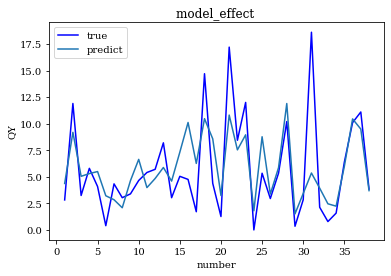

In [18]:
plot_predict(y_test,y_pre)

In [19]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test,y_pre)

In [20]:
print(a)

10.306594406662985


In [21]:
xgb.fit(X_m,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=27, reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.65, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [22]:
y_pre=xgb.predict(x_test)

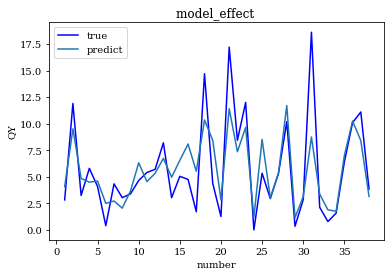

In [23]:
plot_predict(y_test,y_pre)

In [24]:
a=mean_squared_error(y_test,y_pre)
print(a)

6.774878165580542


In [25]:
np.savetxt('y-pre.csv', y_pre, delimiter = ',')

In [59]:
np.savetxt('y-test.csv', y_test, delimiter = ',')

In [60]:
y_train_pre=xgb.predict(x_train)

In [61]:
b=mean_squared_error(y_train_pre,y_train)
print(b)

4.784277737219722


In [36]:
all_data_pre=xgb.predict(X_m)

In [37]:
c=mean_squared_error(all_data_pre,Y)
print(c)

5.182397822891884


In [62]:
np.savetxt('y-train.csv', y_train, delimiter = ',')

In [63]:
np.savetxt('y-train_pre.csv', y_train_pre, delimiter = ',')

In [26]:
df=pd.read_csv(r"C:\Users\yaoyao tang\Jupyter\graduate\input_weibo_dataset.csv")

In [27]:
xx = m.transform(df.values)

In [28]:
xx[0]

array([0.22222222, 1.        , 1.        , 1.        , 0.75      ])

In [29]:
yy_pre_sake=xgb.predict(xx)

In [30]:
#获取排名前十的位置
top_k_idx=yy_pre_sake.flatten().argsort()[::-1][0:10]

In [33]:
for i in top_k_idx:
    print("产率为：",yy_pre_sake[i],"合成条件为：",df.values[i,:])

产率为： 14.227784 合成条件为： [  1.5    0.55  10.   100.     3.  ]
产率为： 14.142373 合成条件为： [ 1.5   0.55 10.   58.    3.  ]
产率为： 14.130972 合成条件为： [  1.5    0.55  20.   100.     3.  ]
产率为： 13.94511 合成条件为： [  1.5    0.55  15.   100.     3.  ]
产率为： 13.925432 合成条件为： [  1.5   0.6  10.  100.    3. ]
产率为： 13.840021 合成条件为： [ 1.5  0.6 10.  58.   3. ]
产率为： 13.708637 合成条件为： [  1.5   0.6  15.  100.    3. ]
产率为： 13.558265 合成条件为： [  1.5   0.6  20.  100.    3. ]
产率为： 13.499636 合成条件为： [  1.5   0.5  20.  100.    3. ]
产率为： 13.411857 合成条件为： [  1.5   0.5  10.  100.    3. ]


In [34]:
print(xgb.feature_importances_)

[0.4037325  0.20270036 0.1132189  0.11756069 0.1627876 ]


In [39]:
np.savetxt('yy_pre_sake.csv', yy_pre_sake, delimiter = ',')